<a href="https://colab.research.google.com/github/JosephIhemefor/DSM-Loan-Predict-Project/blob/main/Ike_Ihemefor_Loan_Prediction_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import sklearn


## Load the values

In [ ]:
df=pd.read_csv('../content/loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df.shape


(9578, 14)

In [ ]:
#count unique values iin column
df[['purpose','not.fully.paid']].nunique()

purpose           7
not.fully.paid    2
dtype: int64

In [ ]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


##Check for missing values

In [ ]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
df.shape

(9578, 14)

In [ ]:
cross_tab = pd.crosstab(df['credit.policy'], df['not.fully.paid'], margins=True)
print(cross_tab)


not.fully.paid     0     1   All
credit.policy                   
0               1349   519  1868
1               6696  1014  7710
All             8045  1533  9578


##lets visualie

<Axes: >

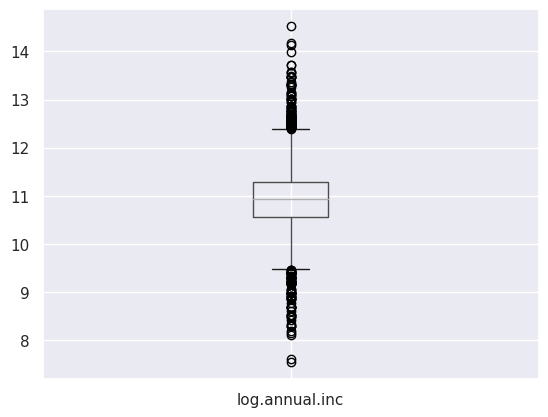

In [ ]:
df.boxplot(column="log.annual.inc")

<Axes: >

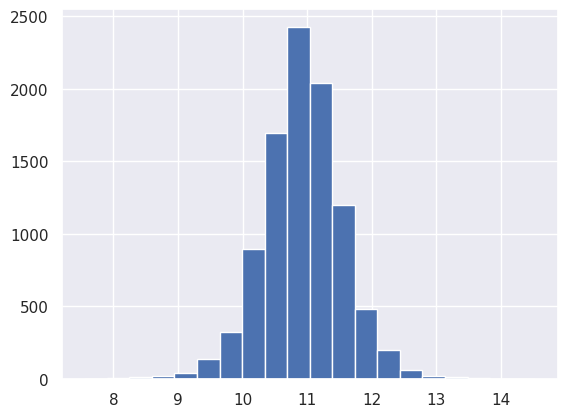

In [ ]:
#lets for a histogram for the same variant;e
df['log.annual.inc'].hist(bins=20)

<ipython-input-19-d659abcc110b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="credit.policy",data=df, palette="Reds")


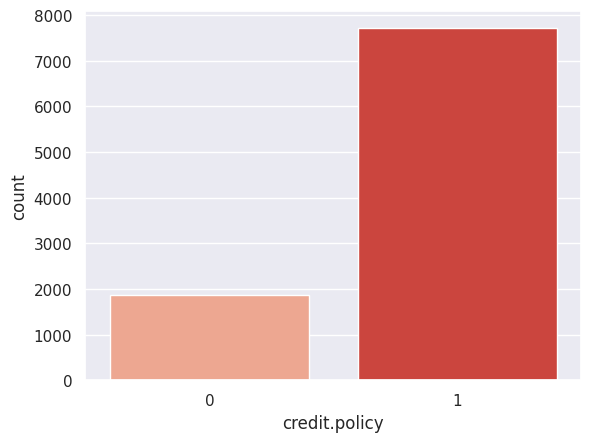

In [ ]:
#check credit.policy
sns.countplot(x="credit.policy",data=df, palette="Reds")
plt.show()


In [ ]:
import warnings
warnings.simplefilter(action= "ignore",category=FutureWarning)

In [ ]:
#  number of each values in column
df['purpose'].value_counts()


purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

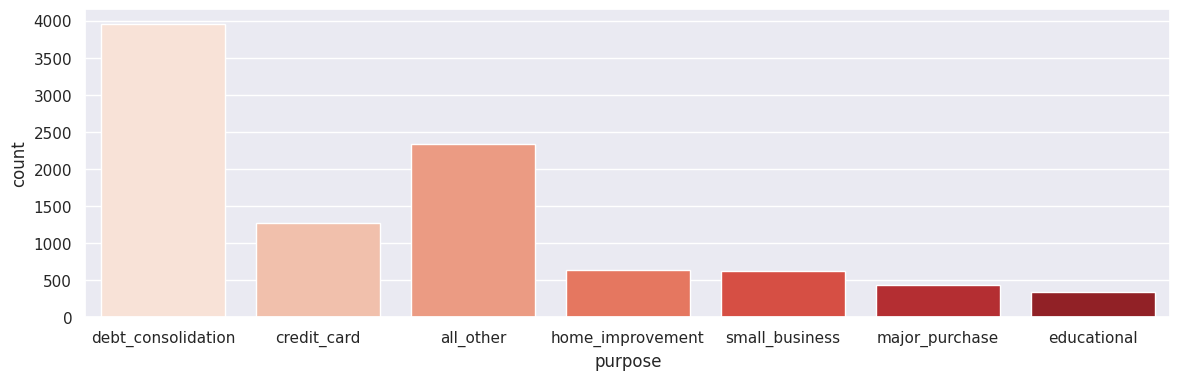

In [ ]:
#check number of each values in  purpose column on graph
plt.figure(figsize=(14,4))
sns.countplot(x="purpose",data=df, palette="Reds")
plt.show()


# label Encoding
## Apply on categorical data
Label Encoding makes it possible for algorithms to interpret and comprehend the data by giving each category within a variable a distinct number.

In [ ]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize LabelEncoder
label_en= LabelEncoder()

In [ ]:
# fit and transfoam the labelencoding
df['purpose']= label_en.fit_transform(df['purpose']) # encode purpose column, assign numerical labels to different categories in the 'purpose' column

In [ ]:
df.head() #purpose column encoded as shown below'


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
df["purpose"].value_counts() # counts te list of unique values in the "purpose" column same  as df['purpose'].nunique


purpose
2    3957
0    2331
1    1262
4     629
6     619
5     437
3     343
Name: count, dtype: int64

In [ ]:
df['purpose'].nunique()

In [ ]:
df.shape

#checking duplicate rows in dataset

In [ ]:
# Count the number of duplicate rows
duplicates = df.duplicated().sum()


In [ ]:
# Print the number of duplicate values
print("Number of duplicate values:",duplicates)

In [ ]:
df['credit.policy'].value_counts()

In [ ]:
df.to_csv('clean_loan_data2.csv')

# data is highly imbalance
1= credit
2- no credit

In [ ]:
# seprating majority  and minority class
majority=df[df['credit.policy']==1] #9
minority=df[df['credit.policy']==0]

In [ ]:
majority_sample=majority.sample(n=1868)#10

In [ ]:
# concatinate two(2) dataset
new_df=pd.concat([majority_sample,minority],axis=0)#10a this must be a row wise concatenation

In [ ]:
print (9578 - 3786)

In [ ]:
new_df.head()

In [ ]:
new_df.shape #11 ?????Actually was expecting 1868 rows turns out to be 1868 * 2 rows ??? HOW

In [ ]:
print(1868*2)

In [ ]:
new_df['credit.policy'].value_counts() # ans to #11 above, credit policy comprising maj & min is only one col in the table

# Target Variable Splitting¶

In [ ]:
# Split data to be used in the models
#create matrix of features
x = new_df.drop('credit.policy',axis=1) #grabs everything else but credit.policy column. note axis=1
y = new_df['credit.policy']# y is the column that we're trying to predict

In [ ]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [ ]:
print(y.shape, x.shape)

In [ ]:
#Use x and y to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x_transform, y, test_size=.10, random_state=101)